#Check data you will use

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Plotting decision boundaries
def plot_decision_boundary(X, y, classifier, title):
    h = .02  # step size in the mesh

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X[:,:], y[:], test_size = 0.2, random_state=0)

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

'''
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
                                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
criterion, max_depth, mini_samples_split, min_samples_leaf
'''
# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

In [ ]:
plt.bar(iris.feature_names, classifier.feature_importances_)
plt.ylabel("Feature importances")

In [ ]:
from sklearn import tree

plt.figure( figsize=(15,10) )
tree.plot_tree(classifier, class_names=iris.target_names, feature_names=iris.feature_names, impurity=True)

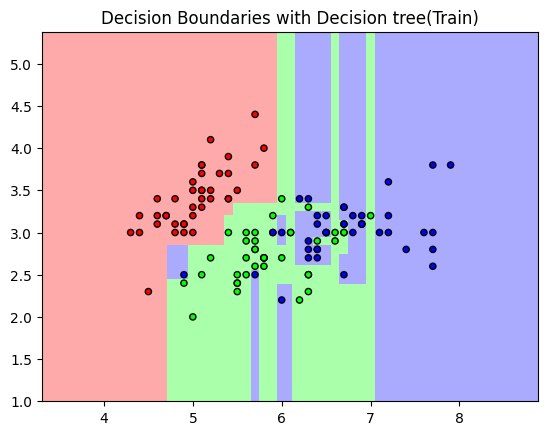

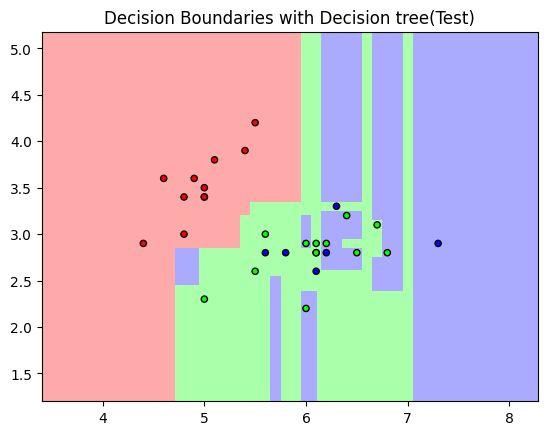

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:,[0,1]], y[:], test_size = 0.2, random_state=0)

# Create a Decision Tree classifier
classifier = DecisionTreeClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

plot_decision_boundary(X_train, y_train, classifier, 'Decision Boundaries with Decision tree(Train)')

plot_decision_boundary(X_test, y_test, classifier, 'Decision Boundaries with Decision tree(Test)')

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation and print the accuracy scores
scores = cross_val_score(classifier, X, y, cv=10)
print(scores)

##__Advance__
Maybe, it is paramount

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X[:,:], y[:], test_size = 0.2, random_state=0)

params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

# min_impurity_decrease : 최소 불순도
# min_impurity_split : 나무 성장을 멈추기 위한 임계치
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)

dt = gs.best_estimator_
print(dt.score(X_test, y_test))

In [ ]:
from sklearn import tree
classifier = DecisionTreeClassifier(max_depth=5,min_impurity_decrease=0.0001,min_samples_split=42)

# Train the classifier on the training data
classifier.fit(X_train, y_train)

plt.figure( figsize=(9,6) )
tree.plot_tree(classifier, class_names=iris.target_names, feature_names=iris.feature_names, impurity=True)

#Appendix

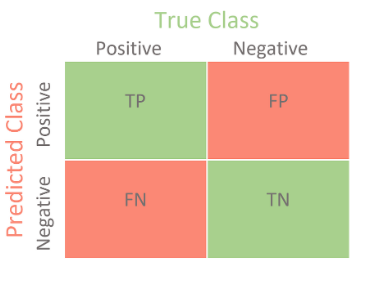





$Precision = \frac{TP}{TP+FP}$

$Recall = \frac{TP}{TP+FN}$

$Accuracy = \frac{TP+TN}{TP+TN+FN+FP}$

$f_1 score = 2\times \frac{precision\times recall}{precision+ recall}$


#Random Forest

In [ ]:
import seaborn as sns

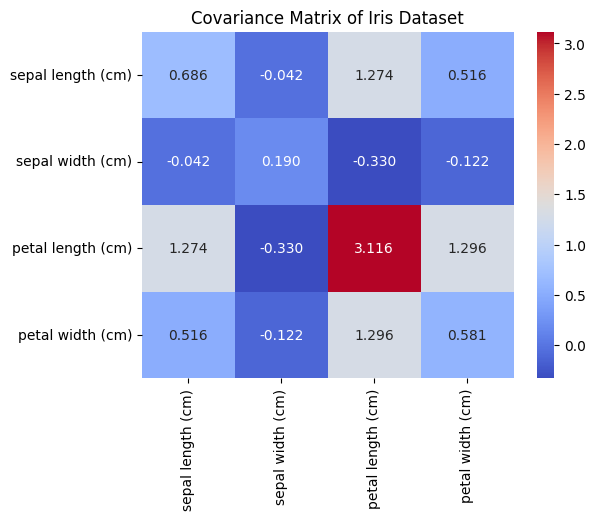

In [ ]:
feature_names = iris.feature_names

# Calculate the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

plt.figure(figsize=(6, 4.5))
sns.heatmap(cov_matrix, annot=True, fmt=".3f", cmap="coolwarm", xticklabels=feature_names, yticklabels=feature_names)
plt.title('Covariance Matrix of Iris Dataset')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(max_depth=4)

'''
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                              min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
                                              bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
                                              ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
'''

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy : {acc: .4f}\n")

Random Forest accuracy :  1.0000



In [ ]:
plt.bar(iris.feature_names,rf_clf.feature_importances_)
plt.ylabel("Feature importances")

In [ ]:
# Visualize the decision tree
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), dpi=800)

for i in range(2):  # Plot the first 2 trees
    tree = rf_clf.estimators_[i]
    plot_tree(tree, ax=axes[i], filled=True, feature_names=iris.feature_names, fontsize=8)
    axes[i].set_title(f'Tree {i+1}')

plt.show()

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
R-squared: 1.0


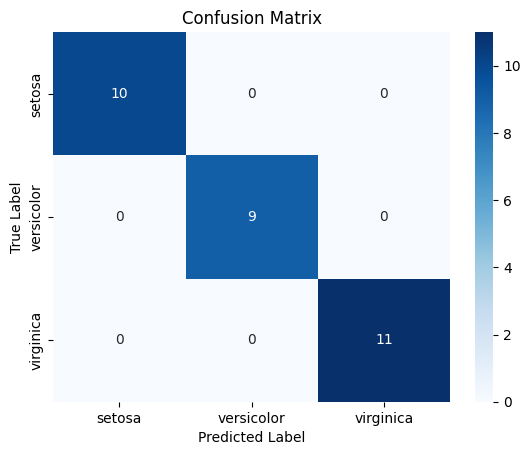

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)
print(f"R-squared: {r2}")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기(기본값은 하드보팅방식)
# 개별 모델을 estimators라는 리스트 인자에다가 (key, value) 튜플 형태로 넣어주기
ensemble = VotingClassifier(estimators=[('LR', lr_clf),
                                     ('KNN', knn_clf)],
                         voting='soft')
'''
class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)
'''

x_train, x_test, y_train, y_test = train_test_split(X[:,:], y[:], test_size=0.2, random_state=42)

# Training
ensemble.fit(x_train, y_train)
pred_y = ensemble.predict(x_test)
print('Voting estimator accuracy', accuracy_score(y_test, pred_y))

# LR, KNN 개별모델로도 학숩해보기
models = [lr_clf, knn_clf]
for model in models:
    model.fit(x_train, y_train)
    pred_y = model.predict(x_test)
    model_name = model.__class__.__name__
    print(f"{model_name} accuracy :{accuracy_score(y_test, pred_y)}")

#Bagging / Boosting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifier
base_classifier = DecisionTreeClassifier()

# Create bagging ensemble
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=10, random_state=42)

'''
class sklearn.ensemble.BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False,
                                        oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)
'''


# Train ensemble
bagging_classifier.fit(X_train, y_train)

# Predictions
y_pred = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bagging ensemble accuracy:", accuracy)


Bagging ensemble accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
#class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None

###Gradient Boosting Decision Tree(GBDT)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



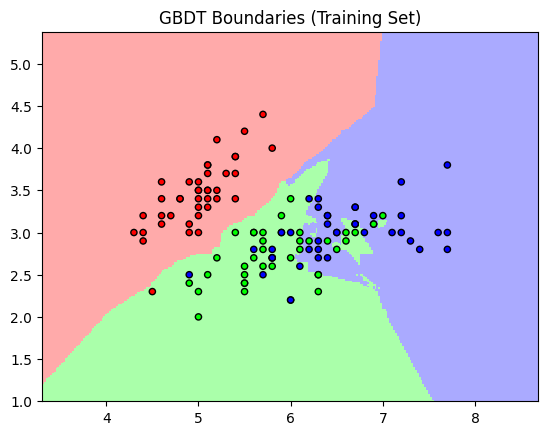

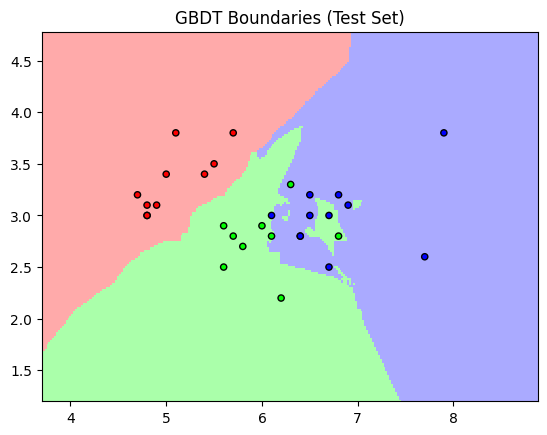

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
'''
Parameters in GradientBoostingClassifier
loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
 n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0
'''
# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n", class_report)
plot_decision_boundary(X_train[:,[0,1]], y_train, gb_classifier, "GBDT Boundaries (Training Set)")
plot_decision_boundary(X_test[:,[0,1]], y_test, gb_classifier, "GBDT Boundaries (Test Set)")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



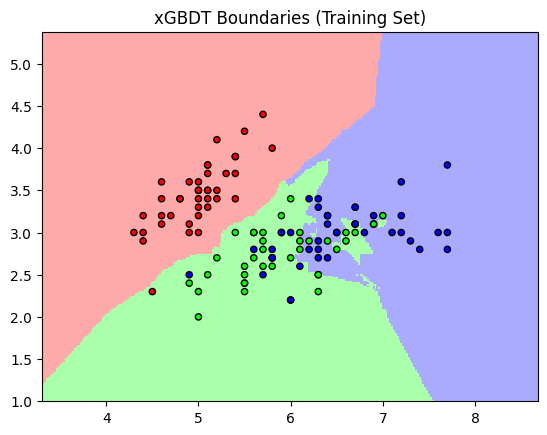

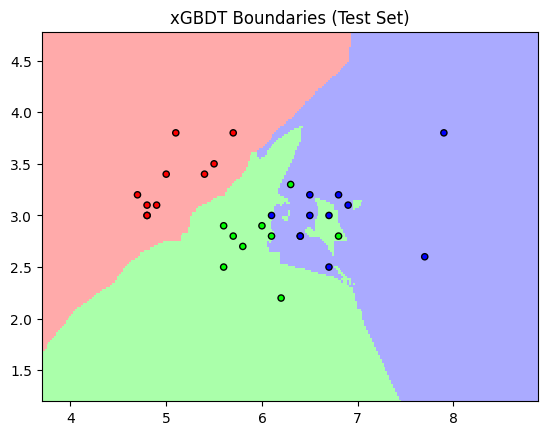

In [ ]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = XGBClassifier()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)
plot_decision_boundary(X_train[:,[0,1]], y_train, classifier, "xGBDT Boundaries (Training Set)")
plot_decision_boundary(X_test[:,[0,1]], y_test, classifier, "xGBDT Boundaries (Test Set)")

#K-Nearest neighbor(KNN)

Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      0.69      0.72        13
           2       0.43      0.50      0.46         6

    accuracy                           0.77        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.78      0.77      0.77        30



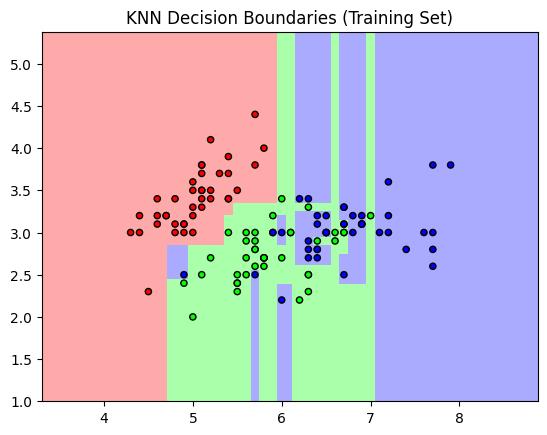

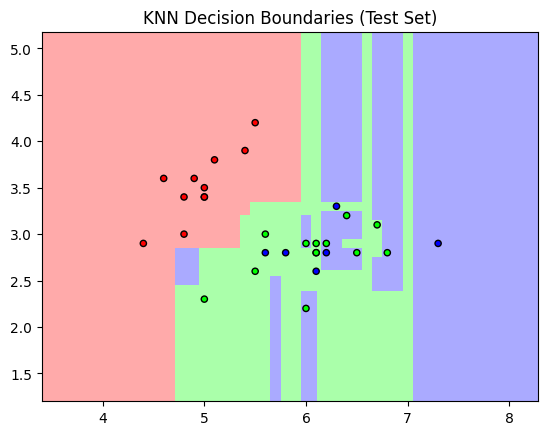

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X[:,[0,1]], y[:], test_size = 0.2, random_state=0)

neigh=KNeighborsClassifier(n_neighbors=4)

'''
class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30,
                                             p=2, metric='minkowski', metric_params=None, n_jobs=None)
'''
neigh.fit(X_train,y_train)

neigh.score(X_test,y_test)
y_pred = neigh.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)



# Plot decision boundaries on the training set
plot_decision_boundary(X_train, y_train, classifier, "KNN Decision Boundaries (Training Set)")

# Plot decision boundaries on the test set
plot_decision_boundary(X_test, y_test, classifier, "KNN Decision Boundaries (Test Set)")